In [1]:
# Customer Lifetime Value Prediction
!pip install scikit-learn matplotlib seaborn

In [2]:
#Import libraries as per requirement
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data=pd.read_csv("21_customer_lifetime_value.csv")
data.head()

,customer_id,purchase_history,tenure,total_spent,CLV
0,C1000,39,37,1111.72,3427.80
1,C1001,29,36,8556.68,25670.04
2,C1002,15,24,5317.54,10635.08
3,C1003,43,31,8276.62,21381.27
4,C1004,8,6,3053.91,1526.96


In [4]:
X=data[['purchase_history','tenure','total_spent']] #Features
y=data[['CLV']] #Target
# Split into Training Data and Testing Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [[ -2.55180952 440.27429149   2.54451595]]
Intercept: [-13413.82152459]


In [7]:
# Make Predictions
y_pred=model.predict(X_test)

In [8]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squred Error:",mean_squared_error(y_test,y_pred))
print("R square score:",r2_score(y_test,y_pred))

Mean Squred Error: 16630405.933774486
R square score: 0.8417185689952879


In [9]:
print(y_pred)

[[  8827.69125631]
 [  8142.16690323]
 [ 20012.54881493]
 [ -7840.50195209]
 [ 23806.17221813]
 [ 10477.96298052]
 [  2614.128681  ]
 [  8729.55087769]
 [   889.89632551]
 [   117.28303029]
 [  3039.62974167]
 [ 22974.58212439]
 [ 25038.72927358]
 [  9613.37659008]
 [  9140.21217293]
 [ 14087.70687733]
 [ 17027.92017185]
 [ 22243.78546244]
 [ 21585.11052706]
 [ -8917.83865268]
 [ -7634.70565731]
 [ 23536.23763695]
 [ -5116.09094411]
 [  6306.9343467 ]
 [  1483.56479977]
 [  9443.03174737]
 [ 16693.53140016]
 [ 14889.88927124]
 [ 20483.46316804]
 [ 24134.65922114]
 [ 25607.78076183]
 [ 17271.87139427]
 [ 18440.20079682]
 [ -4918.47808135]
 [ 35641.27186928]
 [  2343.35922099]
 [  7161.29511721]
 [ 14880.48699412]
 [ 17647.61603355]
 [ 12838.68605078]
 [  7847.36605975]
 [  4997.63447431]
 [ 13281.99871967]
 [ 21247.48407098]
 [ 12819.80113861]
 [ 15740.28884254]
 [  8993.72618456]
 [  4636.64159932]
 [ 27485.42615086]
 [ 23232.38482037]
 [ 20798.50991796]
 [  3063.54890409]
 [  9829.053

In [10]:
print(y_test)

          CLV
993   9256.65
859   3170.17
298  17685.30
553    566.37
672  24887.06
..        ...
679   5464.86
722   2283.45
215   7465.34
653  14483.39
150  15840.93

[200 rows x 1 columns]


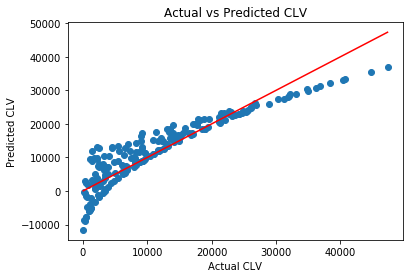

In [11]:
# Plotting
plt.scatter(y_test,y_pred)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted CLV")
plt.plot([y.min(),y.max()], [y.min(),y.max()],color='red',linestyle='-')
plt.show()

In [12]:
# Predicting a new Customer Liftime Value
new_CLV=pd.DataFrame({'purchase_history':[47],'tenure':[20],'total_spent':[120987.22]})
CLV=model.predict(new_CLV)
print(CLV[0])

[303125.64013889]
